**MARKETING ANALYSIS, EDA AND CLUSTERING**


*About our dataset*
This dataset is made by the following variables:  <br>
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise <br>
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise <br>
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise <br>
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise <br>
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise <br>
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise <br>
Complain - 1 if customer complained in the last 2 years <br>
DtCustomer - date of customer’s enrolment with the company <br>
Education - customer’s level of education <br>
Marital - customer’s marital status <br>
Kidhome - number of small children in customer’s household <br>
Teenhome - number of teenagers in customer’s household <br>
Income - customer’s yearly household income <br>
MntFishProducts - amount spent on fish products in the last 2 years <br>
MntMeatProducts - amount spent on meat products in the last 2 years <br>
MntFruits - amount spent on fruits products in the last 2 years <br>
MntSweetProducts - amount spent on sweet products in the last 2 years <br>
MntWines - amount spent on wine products in the last 2 years <br>
MntGoldProds - amount spent on gold products in the last 2 years <br>
NumDealsPurchases - number of purchases made with discount <br>
NumCatalogPurchases - number of purchases made using catalogue <br>
NumStorePurchases - number of purchases made directly in stores <br>
NumWebPurchases - number of purchases made through company’s web site <br>
NumWebVisitsMonth - number of visits to company’s web site in the last month <br>
Recency - number of days since the last purchase <br>


My aim is to analyze my dataset and perform a customer cluster analysis on it.


*IMPORT NECESSARY LIBRARIES*


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from datetime import datetime as dt

In [2]:
os.chdir('C:/Users/Fabio Spampinato/Desktop')

In [3]:
df= pd.read_csv('marketing_campaign.csv',delimiter='\t')

Drop null values from our dataset 


In [4]:
df = df.dropna()

In [5]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Let's explore our dataset


In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [8]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [9]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<Axes: ylabel='Education'>

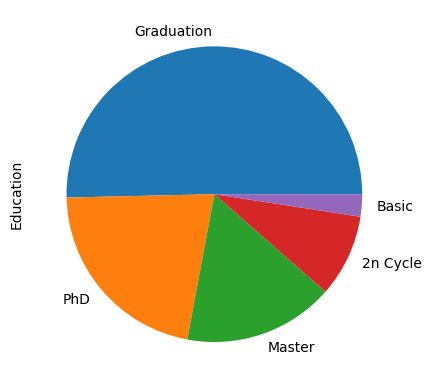

In [10]:
df['Education'].value_counts().plot(kind='pie')

**DATA ENGINEERING**

In order to perform a better analysis we can create other columns by using the ones that our dataset provide us 



Let's compute the total number of childrens for each customer

In [12]:
df['Tot_Children'] = df['Kidhome'] + df['Teenhome']

Let's compute the total number of Spent for each customer

In [14]:
df['Total_Mspent'] = df['MntFruits']+df['MntGoldProds']+df['MntWines']+df['MntMeatProducts']+df['MntSweetProducts']+df['MntFishProducts']

In [15]:
df['Total_Mspent'].mean()

607.0753610108303

In [16]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Tot_Children,Total_Mspent
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,2,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,1,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,1,422


Now we can modify the Marital Status's column in order to have a better idea of how many people there are in a family


In [18]:
dic = {'Single':1,'Together':2,'Married':2,'Divorced':1,'Widow':1,'Absurd':1,'Alone':1,'YOLO':1}
df['Marital_Status']=df['Marital_Status'].map(dic)


And compute the total

In [19]:
df['Tot_Fam']=df['Marital_Status']+df['Tot_Children']

Now let's Restructure our education column

In [20]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in ['Basic']:
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(education_level)

In [21]:
ed = {'High':1,'Middle':2,'Low':3}
df['Education_Level'] = df['Education_Level'].map(ed)

We can also use our dt_customer column to obtain year,month and Age of our customers

In [22]:

df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])
df['Year'] = df["Dt_Customer"].dt.year
df['Month'] = df["Dt_Customer"].dt.month
age = []
for i in df["Year_Birth"]:
    if i <= 1959:
        age.append("Elderly")
    elif i > 1959 and i <=1977:
        age.append("MiddleAge")
    else:
        age.append("Young")
df["Age"] = age

C:\Users\Fabio Spampinato\AppData\Local\Temp\ipykernel_18016\3150875629.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])


And classify our customers in three groups by the age

In [23]:
ag={'Elderly':1,'MiddleAge':2,'Young':3}
df['Age']=df['Age'].map(ag)


We can also group our purchases

In [24]:
df['Tot_Npurchase'] = df['NumCatalogPurchases']+df['NumDealsPurchases']+df['NumStorePurchases']+df['NumWebPurchases']

We can drop useless columns

In [25]:
new_df = df.drop(["Education", "Kidhome","Teenhome", "Tot_Children",
           "Dt_Customer", "Z_Revenue",'Z_CostContact','NumCatalogPurchases','NumDealsPurchases','NumStorePurchases','NumWebPurchases','ID','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1)

In [26]:
new_df.head()

,Year_Birth,Marital_Status,Income,Recency,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Total_Mspent,Tot_Fam,Education_Level,Year,Month,Age,Tot_Npurchase
0,1957,1,58138.0,58,7,0,0,0,0,0,0,1,1617,1,1,2012,4,1,25
1,1954,1,46344.0,38,5,0,0,0,0,0,0,0,27,3,1,2014,8,1,6
2,1965,2,71613.0,26,4,0,0,0,0,0,0,0,776,2,1,2013,8,2,21
3,1984,2,26646.0,26,6,0,0,0,0,0,0,0,53,3,1,2014,10,3,8
4,1981,2,58293.0,94,5,0,0,0,0,0,0,0,422,3,1,2014,1,3,19


**EXPLORATORY DATA ANALYSIS**


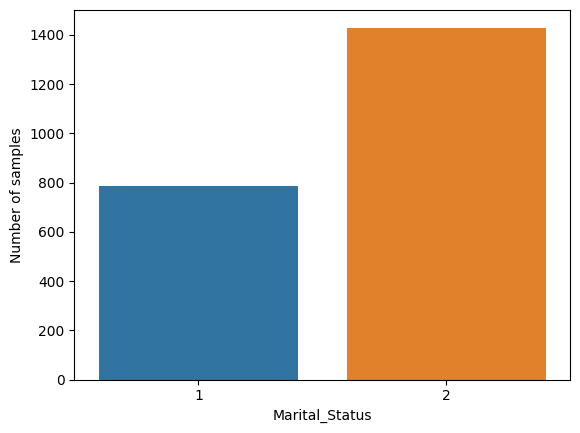

Number of samples According to Education 
2    1430
1     786
Name: Marital_Status, dtype: int64


In [28]:
sns.countplot(x="Marital_Status", data=new_df)
plt.xticks(rotation = 0)
plt.ylabel('Number of samples')
plt.show()
print(f"Number of samples According to Education \n{new_df['Marital_Status'].value_counts()}")

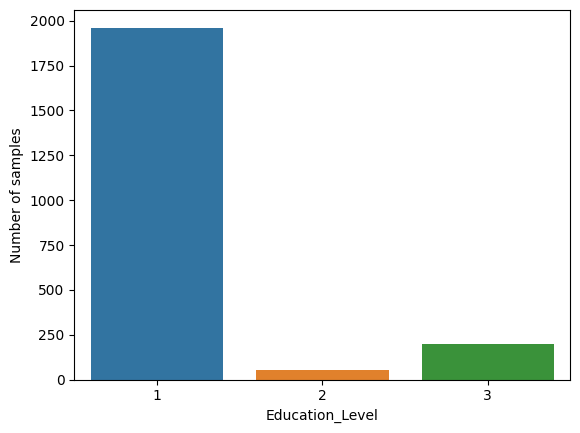

Number of samples According to Education 
1    1962
3     200
2      54
Name: Education_Level, dtype: int64


In [29]:
sns.countplot(x="Education_Level", data=new_df)
plt.xticks(rotation = 0)
plt.ylabel('Number of samples')
plt.show()
print(f"Number of samples According to Education \n{new_df['Education_Level'].value_counts()}")

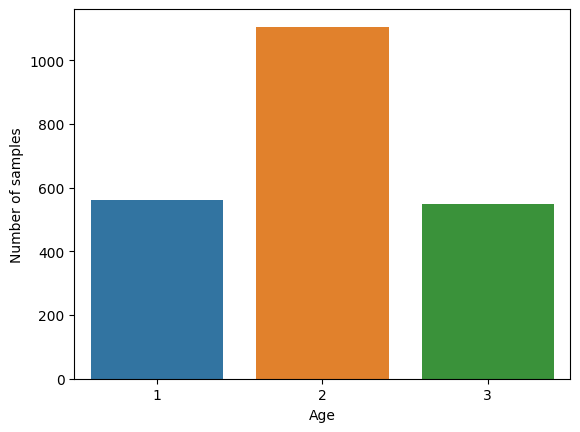

Number of samples According to Education 
2    1106
1     562
3     548
Name: Age, dtype: int64


In [30]:
sns.countplot(x="Age", data=new_df)
plt.xticks(rotation = 0)
plt.ylabel('Number of samples')
plt.show()
print(f"Number of samples According to Education \n{new_df['Age'].value_counts()}")

*RESPONSE BY EDUCATION LEVEL*

In [31]:
pd.crosstab(index= new_df['Education_Level'] , columns=new_df['Response'])

Response,0,1
Education_Level,,
1,1653,309
2,52,2
3,178,22


**RESPONSE BY AGE**


In [32]:
pd.crosstab(index= new_df['Age'] , columns=new_df['Response'])

Response,0,1
Age,,
1,478,84
2,947,159
3,458,90


**ACCEPT RATES FOR CAMPAIGN**

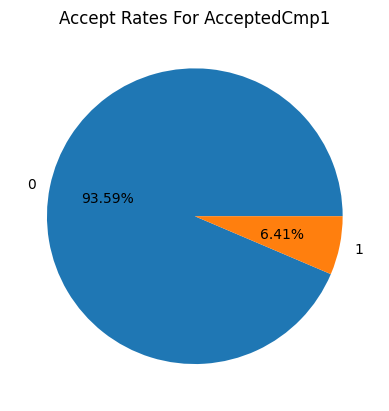

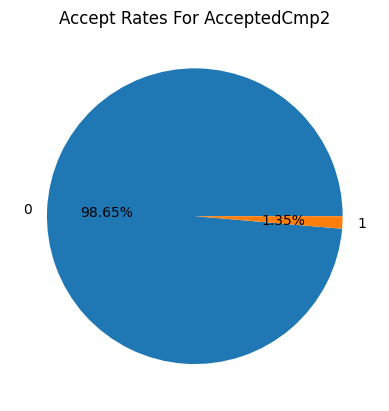

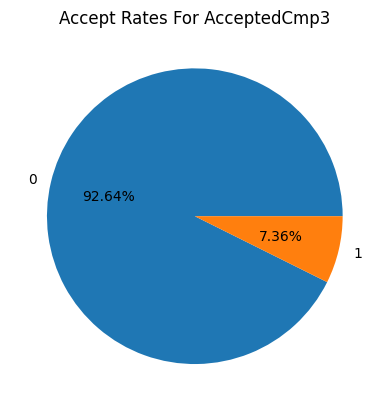

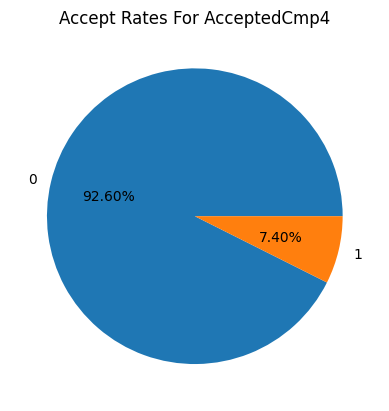

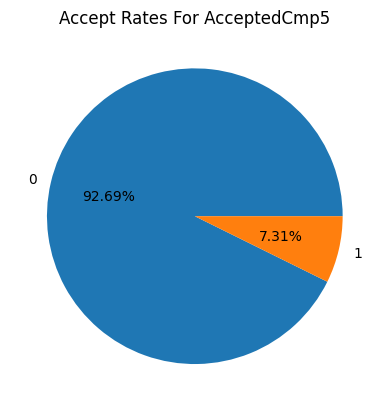

In [33]:
campaigns = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5",]
for i in campaigns:
    accept_rate = (new_df.groupby(i).size() / new_df[i].count()) * 100
    plt.title(f"Accept Rates For {i}")
    plt.pie(accept_rate, labels=new_df[i].unique(), autopct='%1.2f%%')
    plt.show() 

**Monthly Purchases**

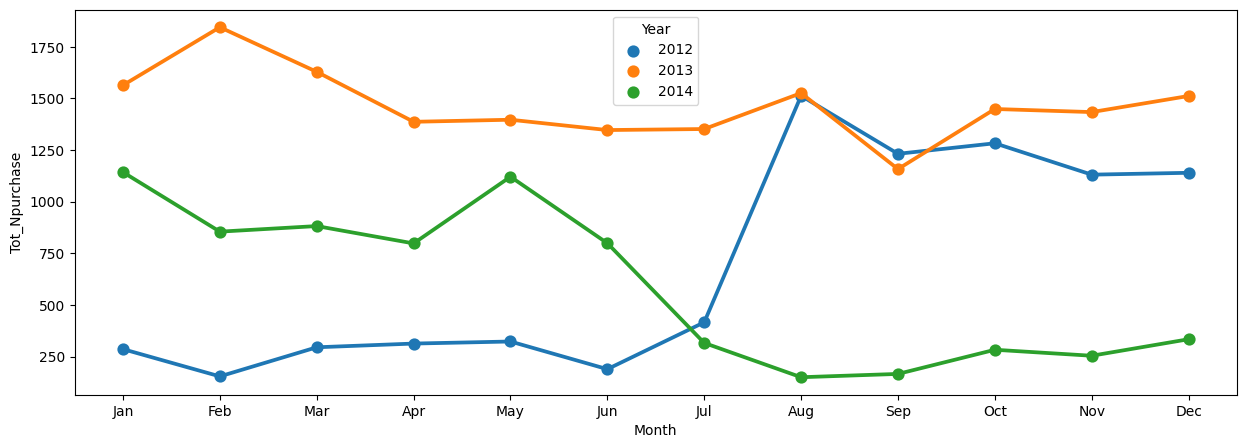

In [34]:
custom_dict = {'Jan':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5,
               'Jul':6, 'Aug':7, 'Sep':8, 'Oct':9, 'Nov':10, 'Dec':11}
temp_data = new_df.copy()
temp_data.Month.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace=True)
df = temp_data[['Month', 'Year', "Tot_Npurchase"]].groupby(["Year","Month"]).sum().reset_index().sort_values(by=['Year','Month', 'Tot_Npurchase'], ascending=False)
df = df.iloc[df['Month'].map(custom_dict).argsort()]
f, ax=plt.subplots(figsize=(15, 5))
sns.pointplot(x='Month', y="Tot_Npurchase", data=df, hue="Year")
plt.show()

Now let's compute a PCA in order to reduce our dimensions  and start Customer Cluster Analysis


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_df)
data = pd.DataFrame(scaler.transform(new_df), columns= new_df.columns )

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(new_df)
PCA_ds = pd.DataFrame(pca.transform(new_df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,3.152039e-12,25176.295525,-50520.371694,-16950.273957,-869.384505,16282.641381,614331.450546
col2,2216.0,-8.208436e-16,448.845265,-1919.399652,-199.712781,80.045530,257.650597,10371.190338
col3,2216.0,-1.898201e-15,28.935602,-50.231301,-24.651423,0.623841,25.059195,51.079138
